# California Housing Data

The objective of this notebook is to build a linear model to predict the homes price given a set of feature. 

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

Features
* `MedInc`: median income in block group
* `HouseAge`: median house age in block group
* `AveRooms`: average number of rooms per household
* `AveBedrms`: average number of bedrooms per household
* `Population`: block group population
* `AveOccup`: average number of household members
* `Latitude`: block group latitude
* `Longitude`: block group longitude


The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.

## Import libraries

In [28]:
import numpy as np

import pandas as pd

from pandas import read_csv

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

from sklearn.datasets import fetch_california_housing

import matplotlib.pyplot as plt
%matplotlib inline

## Loading and exploring the dataset

We will import the housing data from the scikit-learn library. The data comes in the form of a dictionary-like object.

In [29]:
# Importing dataset as dictionary and print a description

housing = fetch_california_housing(as_frame=True)
print(housing.keys())
print(housing['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($10

In [30]:
# a) Showing some examples
print("The differnet keys are: ", housing.keys())
print("The dimension of the data-frame is: ", housing.frame.shape)
print(housing.frame.head(5))

The differnet keys are:  dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
The dimension of the data-frame is:  (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [31]:
# b) Check if there are any missing values

print("Feature name: ", housing.feature_names)
print("Target name: ", housing.target_names)
print(housing.frame.isnull().sum())

Feature name:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target name:  ['MedHouseVal']
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


## Data exploration

feature dimension: dim(X) =  (20640, 8)
target dimension: dim(y) =  (20640,)
MedInc [8.3252 8.3014 7.2574 ... 1.7    1.8672 2.3886]
HouseAge [41. 21. 52. ... 17. 18. 16.]
AveRooms [6.98412698 6.23813708 8.28813559 ... 5.20554273 5.32951289 5.25471698]
AveBedrms [1.02380952 0.97188049 1.07344633 ... 1.12009238 1.17191977 1.16226415]
Population [ 322. 2401.  496. ... 1007.  741. 1387.]
AveOccup [2.55555556 2.10984183 2.80225989 ... 2.3256351  2.12320917 2.61698113]
Latitude [37.88 37.86 37.85 ... 39.43 39.43 39.37]
Longitude [-122.23 -122.22 -122.24 ... -121.22 -121.32 -121.24]


/tmp/ipykernel_2954/1220205154.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/smjoeliz/miniconda3/envs/deep-env/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/smjoeliz/miniconda3/envs/deep-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


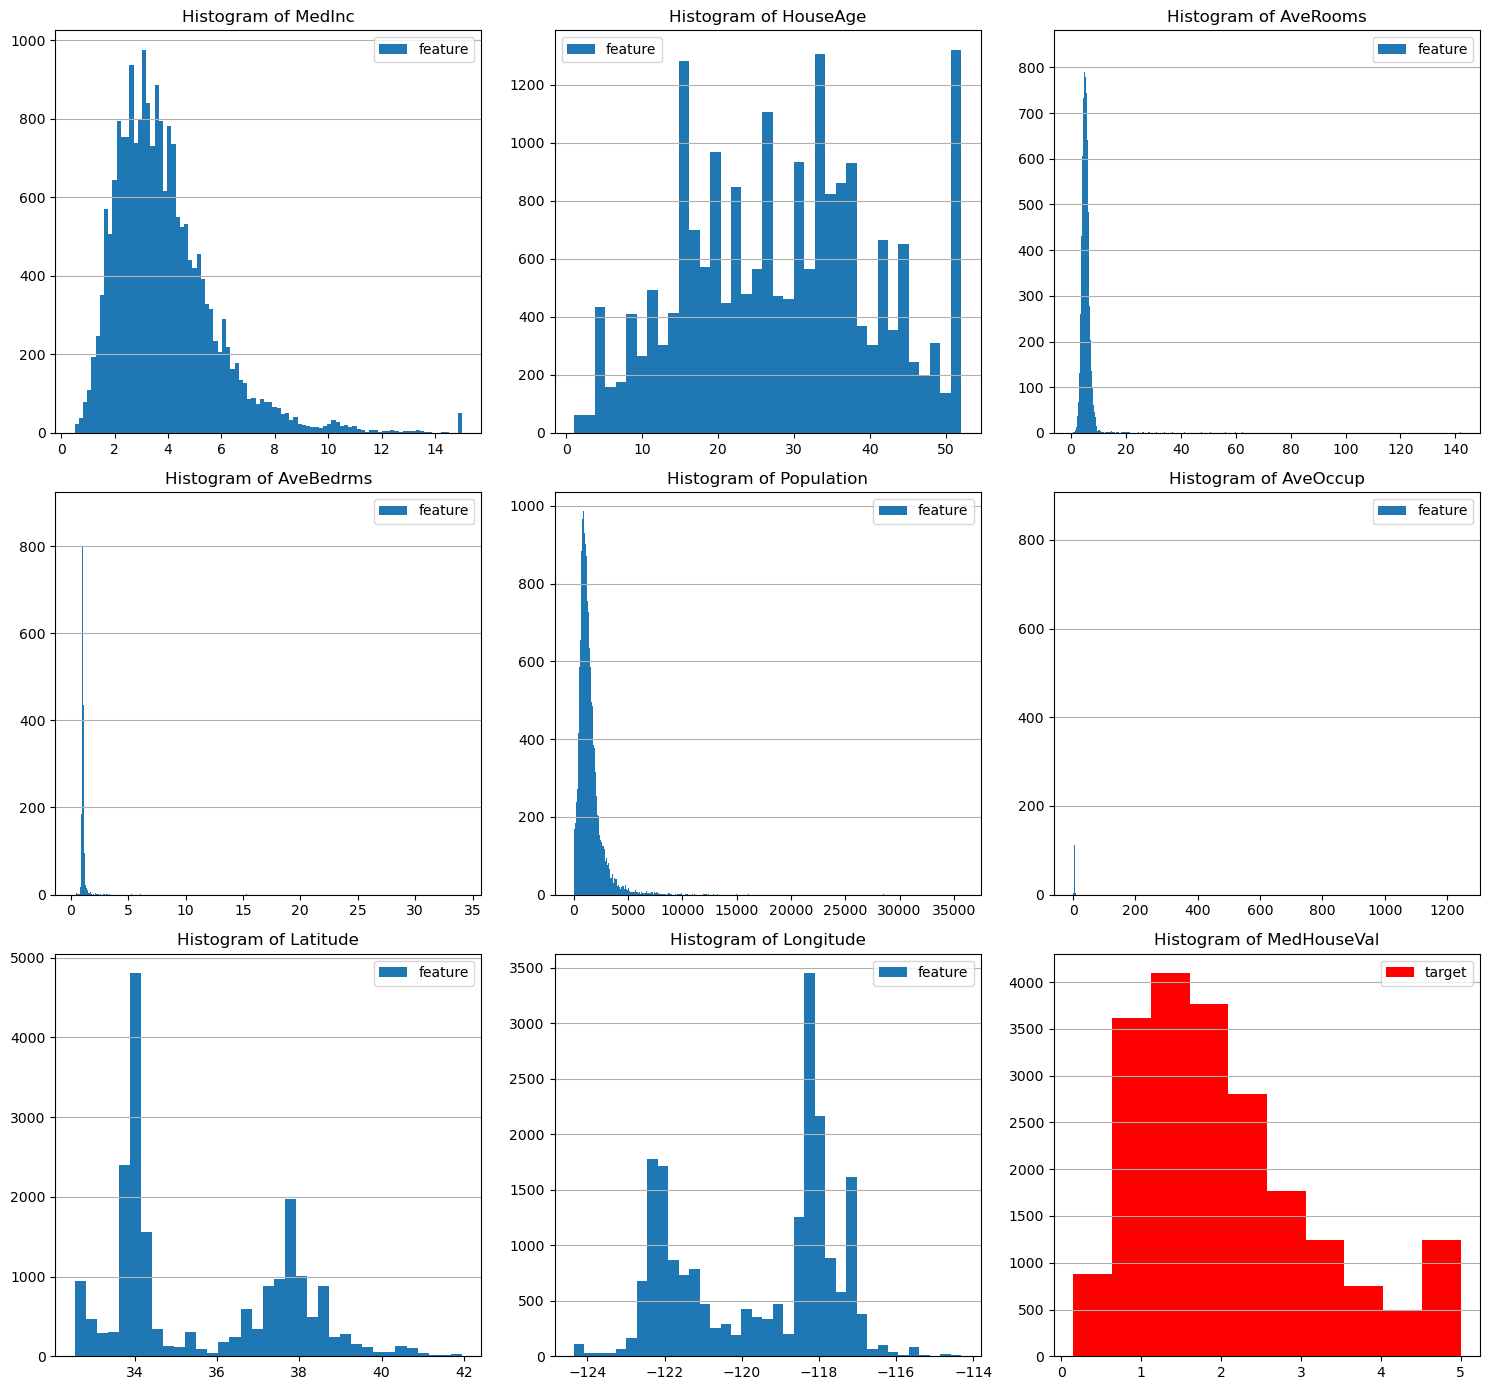

In [32]:
# Assign features values to numpy array X and target values to numpy array y

X = housing.data.to_numpy()   # Features
y = housing.target.to_numpy() # Target


# X and y dimensions

print("feature dimension: dim(X) = ", X.shape)
print("target dimension: dim(y) = ", y.shape)


# Show histograms

plt.figure(figsize=(15, 14))
for j,name in enumerate(housing.feature_names):
    print(name, X[:,j])
    plt.subplot(3, 3, j+1)
    plt.hist(X[:,j], bins = "auto", label='feature')
    plt.title(f"Histogram of {name}")
    plt.legend()
    plt.grid(True, axis = "y")
    
    
plt.subplot(3, 3, len(housing.feature_names)+1)
plt.hist(y, bins = 10, label='target', color = "red")
plt.title(f"Histogram of MedHouseVal")
plt.legend()
plt.grid(True, axis = "y")
plt.tight_layout()

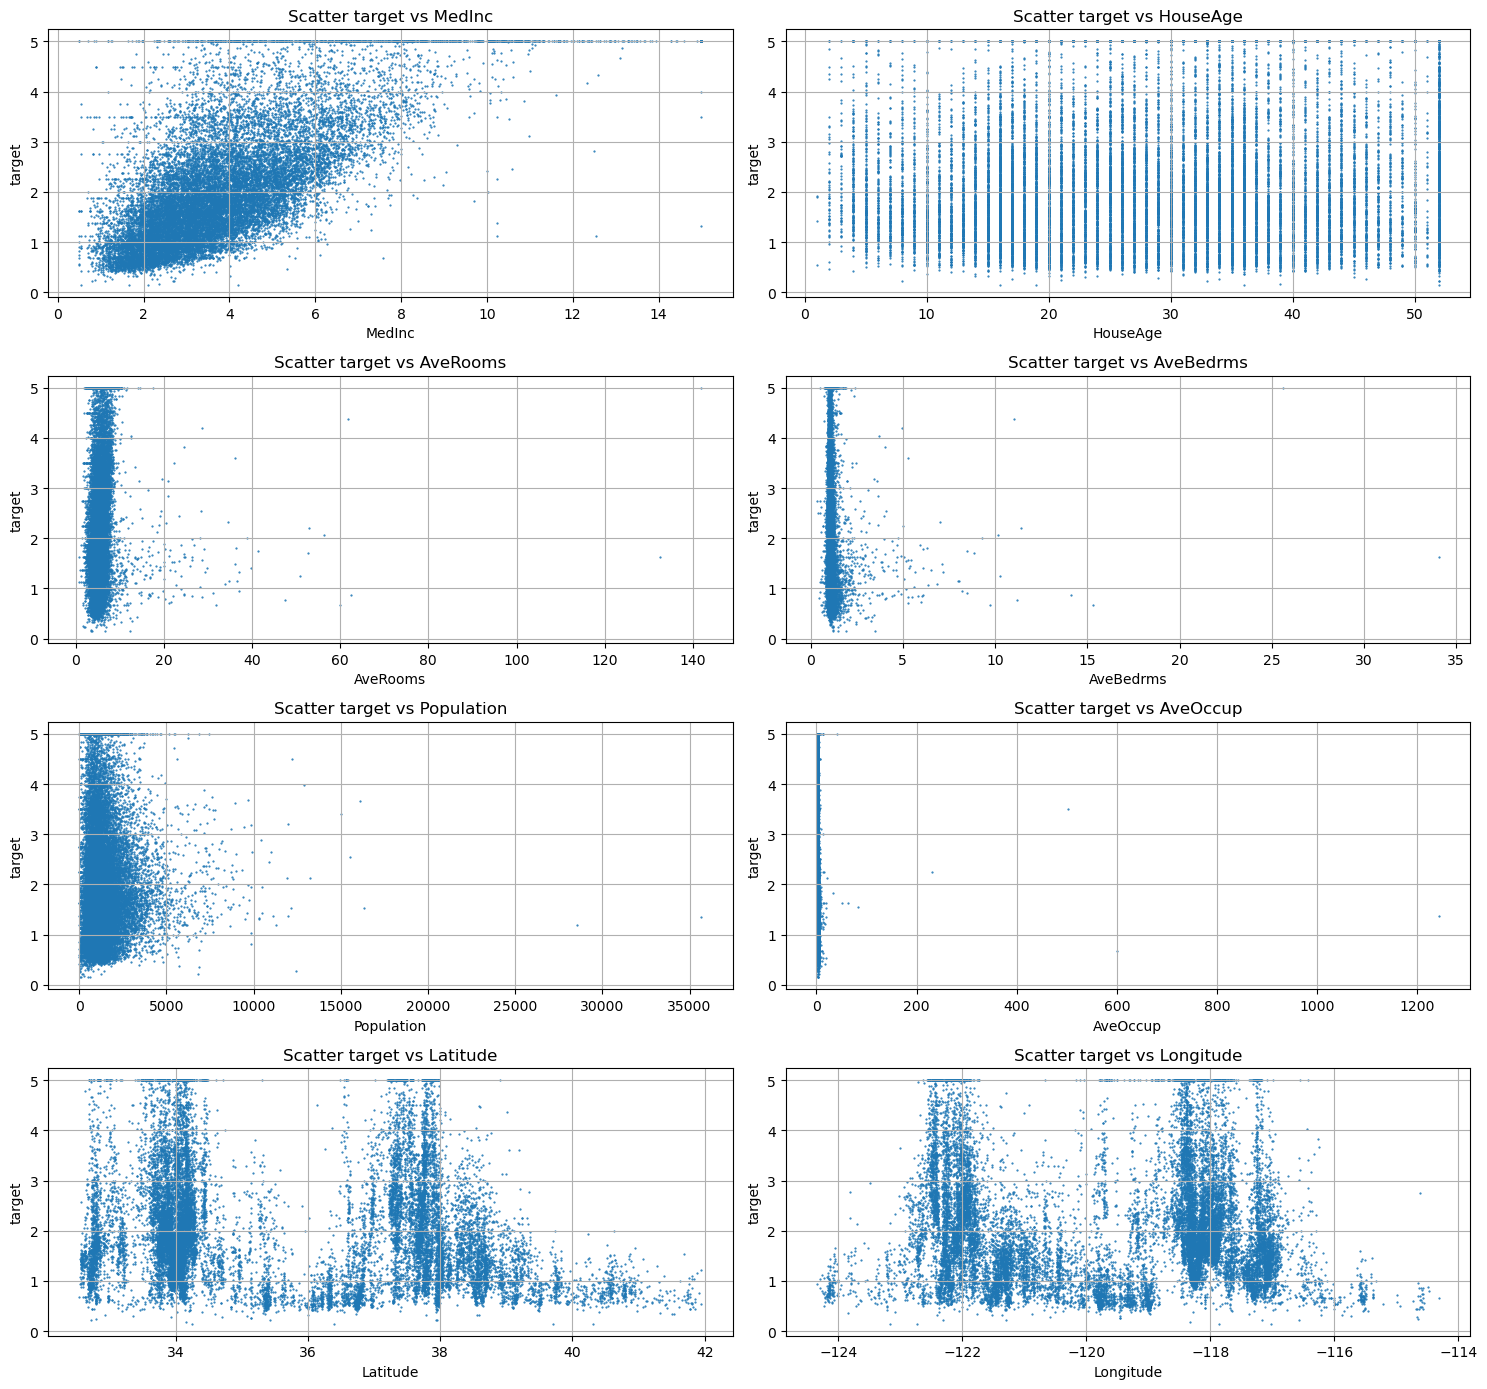

In [33]:
# c) Scatter plots

plt.figure(figsize=(15,14))
for j,name in enumerate(housing.feature_names):
    plt.subplot(4,2,j+1)
    plt.title(f"Scatter target vs {name}")
    plt.scatter(X[:,j],y, s = 0.3)
    plt.xlabel(name)
    plt.ylabel("target")
    plt.grid(True)

plt.tight_layout()

# Split data in train and test samples

In [34]:
# Split the total dataset in a train and a test sample using scikit-learn

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

print("dim(X_train) = ", X_train.shape)
print("dim(X_test) = ", X_test.shape)
print("dim(y_train) = ", y_train.shape)
print("dim(X_test) = ", y_test.shape)

dim(X_train) =  (14448, 8)
dim(X_test) =  (6192, 8)
dim(y_train) =  (14448,)
dim(X_test) =  (6192,)


# Linear regression

Construct a predictive model using linear regression:

$$y_{pred} = w_0 + \sum_{i=1}^{N=13} w_i X_i$$

For this we use the scikit-learn model described here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [35]:
# Fit the linear regression model using the training dataset 

model1 = LinearRegression()
model1.fit(X_train, y_train)

print("Bias term w_0 = ", model1.intercept_)
for i in range(1,9):
    print(f"w_{i} = {model1.coef_[i-1]}" )

Bias term w_0 =  -37.3622661064085
w_1 = 0.45305377110877154
w_2 = 0.010113982378874918
w_3 = -0.13068227653865924
w_4 = 0.8476408454487657
w_5 = -3.4880414749062505e-06
w_6 = -0.003352074577821557
w_7 = -0.42323531158086836
w_8 = -0.4371326083403391



Train sample: RMS = 0.724


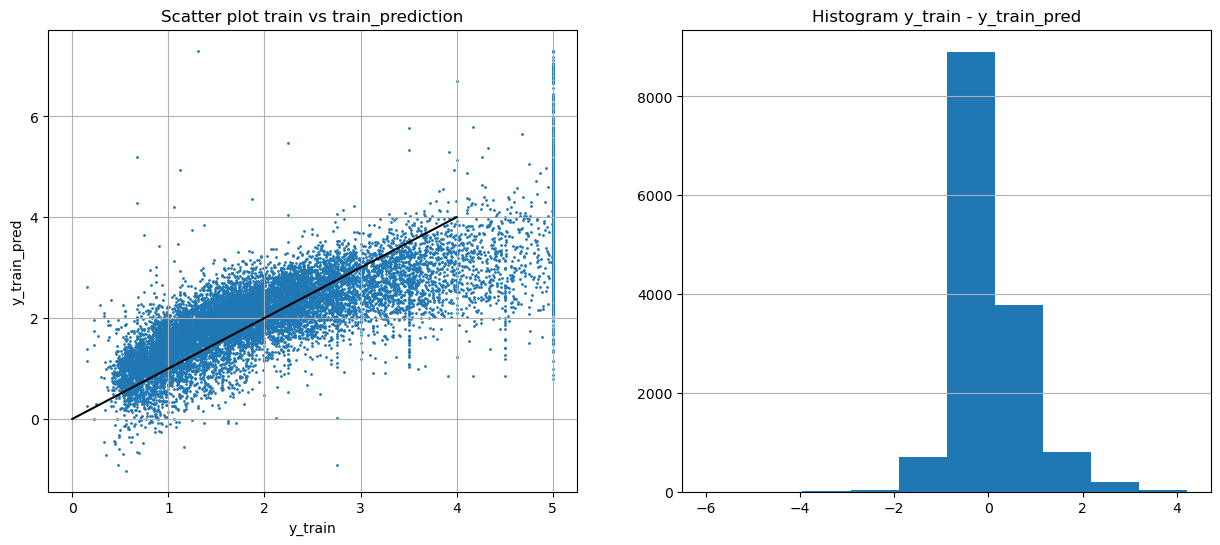

In [36]:
# Get the predicted model output, `y_train_pred`, using the training dataset

y_train_pred = model1.predict(X_train)


# Make a scatter plot of the true target value vs the predicted value 

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Scatter plot train vs train_prediction")
plt.scatter(y_train, y_train_pred, s=1)
plt.plot(range(0,5),range(0,5), color = "black")
plt.xlabel("y_train")
plt.ylabel("y_train_pred")
plt.grid()


# Plot the difference (y_train - y_train_pred) in a histogram.

plt.subplot(1,2,2)
plt.title("Histogram y_train - y_train_pred")
plt.hist(y_train - y_train_pred)
plt.grid(axis = "y")


# Calculate the root mean square error (RMS) between `y_train` and `y_train_pred`. 

print('\nTrain sample: RMS = %.3f' 
      % (np.sqrt(mean_squared_error(y_train,y_train_pred))))  # use scikit-learn function mean_squared_error()

Root Mean Square Value =  0.7296233714789563


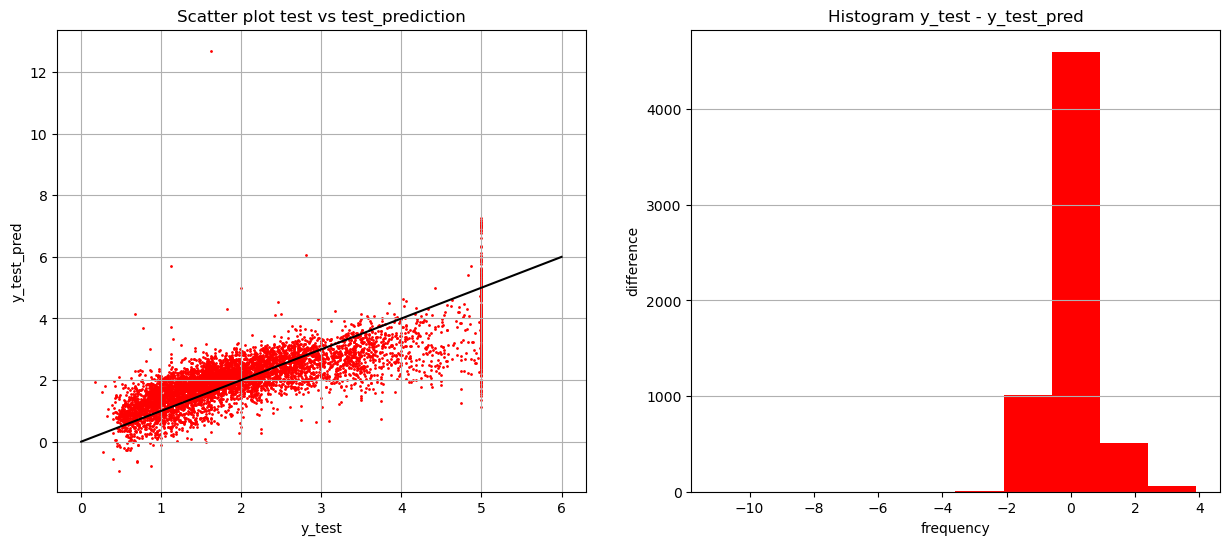

In [37]:
# Repeat scatter plot, histogram and RMS (test)

#scatter plot
y_test_pred = model1.predict(X_test)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Scatter plot test vs test_prediction")
plt.scatter(y_test, y_test_pred, s = 1, c = "red")
plt.plot(range(0,7),range(0,7), color = "black")
plt.xlabel("y_test")
plt.ylabel("y_test_pred")
plt.grid()

# histogram
plt.subplot(1,2,2)
plt.hist(y_test - y_test_pred, color = "red")
plt.title("Histogram y_test - y_test_pred")
plt.ylabel("difference")
plt.xlabel("frequency")
plt.grid(axis = "y")

print("Root Mean Square Value = ", np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Ridge penalty (a.k.a L2 norm)

Penalized linear algorithm can improve the modelling and prediction of the data. For this we use Ridge regression (also called L2 norm) which adds a penalty term to the fit model:

$$y_{pred} = w_0 + \sum_{i=1}^{N=13} w_i X_i + \lambda \sum_{i=0}^{N=13} w_i^2$$

See the scikit-learn implementation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html


b) Apply the algorithm to the test data and check the quality of the model. Do you see any improvement in the data modelling and prediction ? Try other values of $\lambda$.

c) Optional, try Lasso penalty: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html. Does it help ?

Root Mean Square value for Ridge =  0.7295452064077292
RMS for Ridge w/lambda = 1: RMS = 0.7295
RMS for Ridge w/lambda = 2: RMS = 0.7295
RMS for Ridge w/lambda = 3: RMS = 0.7294
RMS for Ridge w/lambda = 4: RMS = 0.7293
RMS for Ridge w/lambda = 5: RMS = 0.7292
RMS for Ridge w/lambda = 6: RMS = 0.7292
RMS for Ridge w/lambda = 7: RMS = 0.7291
RMS for Ridge w/lambda = 8: RMS = 0.7290
RMS for Ridge w/lambda = 9: RMS = 0.7289
RMS for Ridge w/lambda = 10: RMS = 0.7289


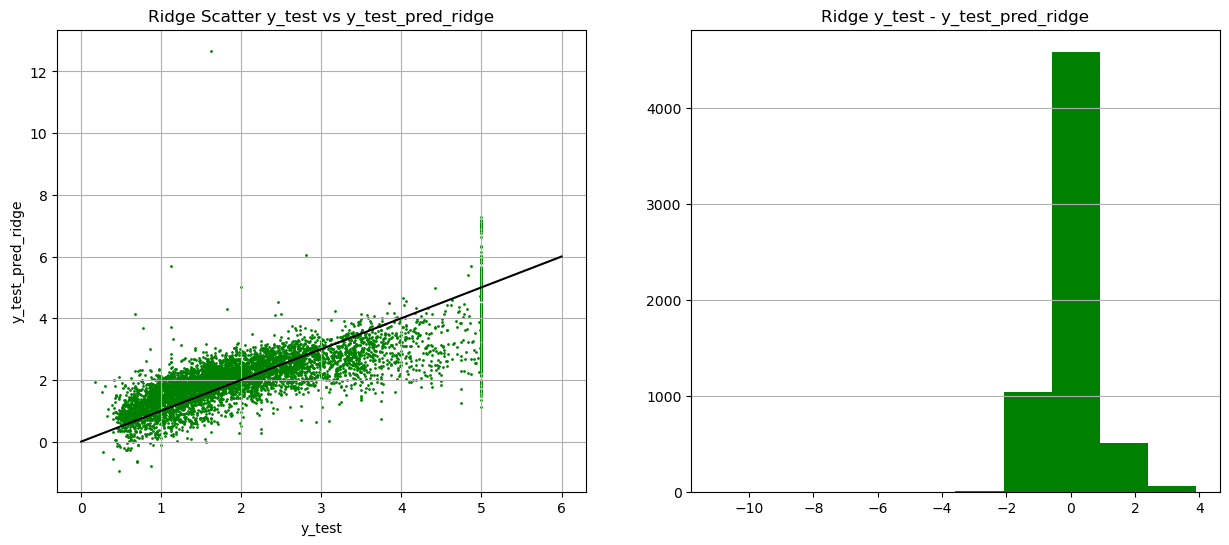

In [38]:
# define Ridge model (L2 norm)

model2 = Ridge(alpha=1) # Alpha sets the lambda regularization parameter =1


# Train and predict for test

model2.fit(X_train,y_train)
y_test_pred_ridge = model2.predict(X_test)
print("Root Mean Square value for Ridge = ", np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)))


# Compare different regularization terms

for i in range(1,11):
    model3 = Ridge(alpha = i)
    model3.fit(X_train,y_train)
    y_test_pred_lambdas= model3.predict(X_test)
    rms_pred_lambdas = np.sqrt(mean_squared_error(y_test, y_test_pred_lambdas)) 
    print(f"RMS for Ridge w/lambda = {i}: RMS = {rms_pred_lambdas:.4f}")


# scatter (test)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Ridge Scatter y_test vs y_test_pred_ridge")
plt.scatter(y_test, y_test_pred_ridge, s = 1, c = "green")
plt.plot(range(0,7), range(0,7), "k")
plt.xlabel("y_test")
plt.ylabel("y_test_pred_ridge")
plt.grid()


# Hist (test)

plt.subplot(1,2,2)
plt.title("Ridge y_test - y_test_pred_ridge")
plt.hist(y_test - y_test_pred_ridge, bins = 10, color = "green")
plt.grid(axis = "y")


RMS for Lasso w/lambda = 1 = 0.960
RMS for Lasso w/lambda = 2 = 1.141
RMS for Lasso w/lambda = 3 = 1.141
RMS for Lasso w/lambda = 4 = 1.141
RMS for Lasso w/lambda = 5 = 1.141
RMS for Lasso w/lambda = 6 = 1.141
RMS for Lasso w/lambda = 7 = 1.141
RMS for Lasso w/lambda = 8 = 1.141
RMS for Lasso w/lambda = 9 = 1.141
RMS for Lasso w/lambda = 10 = 1.141


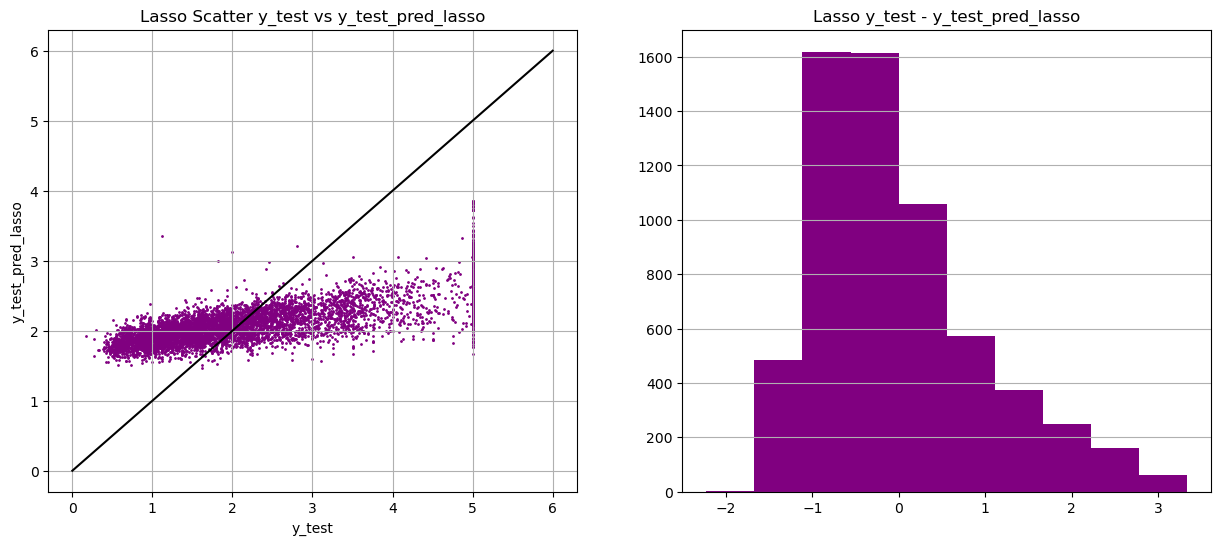

In [39]:
# Use Lasso penalty

model4 = Lasso(alpha=1)
model4.fit(X_train,y_train)
y_test_pred_lasso = model4.predict(X_test)

for i in range(1,11):
    model5 = Lasso(alpha = i)
    model5.fit(X_train,y_train)
    y_test_pred_Lasso = model5.predict(X_test)
    rms_pred_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_Lasso))
    print(f"RMS for Lasso w/lambda = {i} = {rms_pred_lasso:.3f}")

# Scatter (test)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Lasso Scatter y_test vs y_test_pred_lasso")
plt.scatter(y_test, y_test_pred_lasso, s = 1, c = "purple")
plt.plot(range(0,7), range(0,7), "k")
plt.xlabel("y_test")
plt.ylabel("y_test_pred_lasso")
plt.grid()

# Hist  (test)
plt.subplot(1,2,2)
plt.title("Lasso y_test - y_test_pred_lasso")
plt.hist(y_test - y_test_pred_lasso, bins = 10, color = "purple")
plt.grid(axis = "y")


## Estimating model performance: Cross-validation

Instead of splitting the dataset in one training and one test samples we can use cross-validation to better determine the performance of a fit model. For this we apply the following [procedure](https://machinelearningmastery.com/k-fold-cross-validation/):
- Shuffle the dataset randomly.
- Split the dataset into k groups
- For each unique group:
  - Take the group as test data set
  - Take the k-1 remaining groups as a training data set
  - Fit a model on the training set and evaluate it on the test set
  - Retain the evaluation score and discard the model
- Summarize the skill of the model using the sample of model evaluation scores

In [40]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=False)
scores = cross_val_score(model1, X, y, scoring='neg_mean_squared_error', cv=cv)
scores = np.absolute(scores)
print('Mean RMS: %.2f +- %.2f' % (np.mean(np.sqrt(scores)),np.std(np.sqrt(scores))))

Mean RMS: 0.75 +- 0.04


In [41]:
# Apply the cross-validation to the other models 

scores_Linear = cross_val_score(model1,X, y, scoring='neg_mean_squared_error', cv=cv)
scores_Lasso = cross_val_score(model2,X, y, scoring='neg_mean_squared_error', cv=cv)
scores_Ridge = cross_val_score(model4,X, y, scoring='neg_mean_squared_error', cv=cv)

scores_Linear = np.absolute(scores_Linear)
scores_Lasso = np.absolute(scores_Lasso)
scores_Ridge = np.absolute(scores_Ridge)

print('Mean RMS for Linear: %.2f +- %.2f' % (np.mean(np.sqrt(scores_Linear)),np.std(np.sqrt(scores_Linear))))
print('Mean RMS for Lasso: %.2f +- %.2f' % (np.mean(np.sqrt(scores_Lasso)),np.std(np.sqrt(scores_Lasso))))
print('Mean RMS for Ridge: %.2f +- %.2f' % (np.mean(np.sqrt(scores_Ridge)),np.std(np.sqrt(scores_Ridge))))

Mean RMS for Linear: 0.75 +- 0.04
Mean RMS for Lasso: 0.75 +- 0.04
Mean RMS for Ridge: 1.00 +- 0.06
